In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
bhp_data = pd.read_csv('bhp.csv')
bhp_data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [25]:
bhp_data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [26]:
bhp_data.size

92400

# Removing Outliers

In [27]:
max_threshold, min_threshold = bhp_data.price_per_sqft.quantile(0.999), bhp_data.price_per_sqft.quantile(0.001)

In [28]:
# Removing extreme cases
bhp_data_removed_outliers = bhp_data[(bhp_data.price_per_sqft < max_threshold) & (bhp_data.price_per_sqft>min_threshold)]

In [30]:
bhp_data_removed_outliers.size

92204

In [36]:
# removing outliers usig 4 standard devation

std_dev_max = bhp_data_removed_outliers.price_per_sqft.mean() + 4 * bhp_data_removed_outliers.price_per_sqft.std()
std_dev_min = bhp_data_removed_outliers.price_per_sqft.mean() - 4 * bhp_data_removed_outliers.price_per_sqft.std()

df_3 = bhp_data_removed_outliers[(bhp_data_removed_outliers.price_per_sqft > std_dev_min) &  \
                                (bhp_data_removed_outliers.price_per_sqft < std_dev_max)]

In [37]:
df_3.size

91329

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

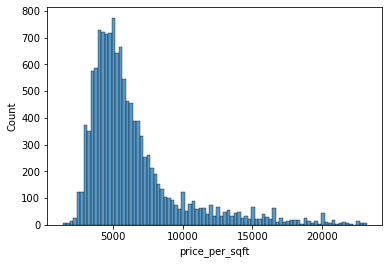

In [38]:
sns.histplot(data = df_3.price_per_sqft)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

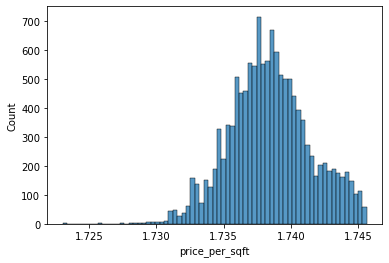

In [44]:
from scipy.stats import boxcox
df_4 = df_3.copy(deep=True)
df_4.price_per_sqft, _ = boxcox(df_4.price_per_sqft)

sns.histplot(data=df_4.price_per_sqft)